In [10]:
import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("..")
from src.model.HyCoSBM import HyCoSBM
from src.data.data_io import load_data, load_attributes


# Training the HyCoSBM model
In this notebook we show how to use HyCoSBM model.

## Load the dataset

An example dataset with preprocessed attributes is available in `data/examples` folder.

`load_data` function can be used to load the hypergraph. In our experiments we preprocessed hypergraphs to be represented as two *.txt* files containing the hyperedge list and weight list respectively. 

`load_attributes` function can be used to load attributes. It requires a path to a csv file containing attributes and a list of attributes which should correspond to the desired columns of the csv file.

The following lines of code load the `high-school` dataset and the attributes `class` and `sex`.

```python
load_data(
    hye_file="../data/examples/high_school_dataset/hyperedges.txt",
    weight_file="../data/examples/high_school_dataset/weights.txt",
)

load_attributes(
    file_path="../data/examples/high_school_dataset/attributes.csv",
    attributes=['class', 'sex']
)
```

In [2]:
dataset = 'high_school'
attributes = ['class', 'sex']

hypergraph = load_data(
    hye_file=f"../data/examples/{dataset}_dataset/hyperedges.txt",
    weight_file=f"../data/examples/{dataset}_dataset/weights.txt",
)

X_attributes = load_attributes(
    file_path=f"../data/examples/{dataset}_dataset/attributes.csv",
    attributes=attributes
)

Alternatively, one can use *.pkl* file that represents a Hypergraph instance as follows

```python
load_data(
    pickle_file="../data/examples/high_school_dataset/hypergraph.pkl",
)
```

In [3]:
hypergraph = load_data(
    pickle_file=f"../data/examples/{dataset}_dataset/hypergraph.pkl",
)

## Model training

To train the model we need to specify the number of communities $K$ and a balancing parameter $\gamma$. We can also specify if the model should presume assortative structure of the network.
If we want to use attributes we need to pass the `X_attributes` variable into the `fit` methods. Otherwise, the value of $\gamma$ is set to 0.

In [4]:
%%time 

model = HyCoSBM(
    K = 11,
    gamma=0.7,
    assortative=True,
)
model.fit(hypergraph, X_attributes)

Wall time: 157 ms


We can visualize the inferred parameters $u$, $w$ and $\beta$ using `plt.matshow` function.

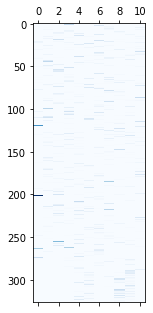

In [5]:
plt.figure(figsize=(2, 5))
plt.matshow(model.u, aspect='auto', cmap='Blues', fignum=1);

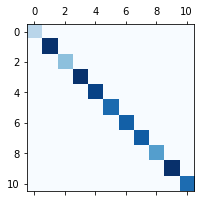

In [6]:
plt.figure(figsize=(3, 3))
plt.matshow(model.w, aspect='auto', cmap='Blues', fignum=1);

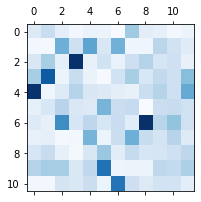

In [7]:
plt.figure(figsize=(3, 3))
plt.matshow(model.beta, aspect='auto', cmap='Blues', fignum=1);

Other training options are the same as HyMMSBM. Similarly to being able to fix $u$ and $w$ parameters, we can also fix $\beta$ by prividing it in the input. We should make sure that the shape of $\beta$ is `(K, Z)`, where Z is the number of attributes used.

In [12]:
%%time 
K = 12
Z = X_attributes.shape[1]

fixed_beta=np.eye(K, Z)

model = HyCoSBM(
    K = K,
    gamma=0.7,
    assortative=True,
    beta=fixed_beta,
)
model.fit(hypergraph, X_attributes)

Wall time: 146 ms


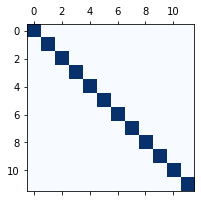

In [13]:
plt.figure(figsize=(3, 3))
plt.matshow(model.beta, aspect='auto', cmap='Blues', fignum=1);

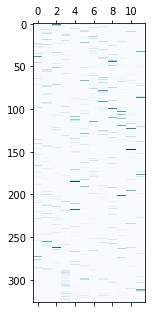

In [14]:
plt.figure(figsize=(2, 5))
plt.matshow(model.u, aspect='auto', cmap='Blues', fignum=1);